# C2M3: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Motivate the use of two-way ANOVA through real data analysis examples.

2. Interpret the two-way ANOVA model, with and without interaction terms.

3. Construct and interpret interaction plots to visually assess the importance of an interaction term.

4. Conduct hypothesis tests to decide whether a two-way ANOVA interaction term is statistically significant.

5. Use the two-way ANOVA and ANCOVA models to answer research questions using real data.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [2]:
# Load Required Packages
library(tidyverse)
library(ggplot2) # a package for nice plots!
library(dplyr)
library(emmeans)

ERROR: Error in library(emmeans): there is no package called ‘emmeans’


# Problem 1: e-reader data

In this assignment, we learn to answer our two-way ANOVA research questions through the analysis of real data. We will use the ereader data. The study that generated these data can be found here: [P.-C. Chang, S.-Y. Chou, K.-K. Shieh (2013). "Reading Performance and Visual Fatigue When Using Electronic Displays in Long-Duration Reading Tasks Under Various Lighting Conditions," Displays, Vol. 34,
pp. 208-214.](http://users.stat.ufl.edu/~winner/data/ereader1.txt)) 

Electronic paper display devices, such as the Amazon Kindle have changed the way that people read. But has it changed for the better? In a 2013 study titled "Reading Performance and Visual Fatigue When Using Electronic Displays in Long-Duration Reading Tasks Under Various Lighting Conditions", researchers set out to ask whether reading speed (a continuous variable) differed across different electronic paper displays. In addition, they were also interested in whether different lighting conditions impacted reading speed. As such, this experiment had one response with two different factors:

1. Device type: three different types.
    1. Sony PRS-700 with a 6-in. display, $800 \times 600$ resolution; 
    2. Amazon Kindle DX with a 9.7-in. display, $1200 \times 824$ resolution; and 
    3. iRex 1000S with a 10.2-in. display, $1024 \times 1280$ resolution.


2. Lighting Condition: four different conditions (200Lx,500Lx, 1000Lx, 1500Lx), Lx = lux, one lumen per square meter


3. Reading Time: measured in seconds.

With these data, we might ask the following **research questions**:

1. Are the effects of device type significant? That is, is there evidence that suggests that individuals read at different speeds based on the device that they are using?


2. Are the effects of lighting conditions significant? That is, is there evidence that suggests that individuals read at different speeds based on the reading lighting conditions?


3. Do device type and lighting conditions *interact*? For example, Suppose that, on average, people can read for longer on device A than on device B, in low light. Is that trend the same in medium light, or bright light? If not, for example, if B is better than A in bright light, then type and lighting interact.

Through this entire analysis, let's set $\alpha = 0.05$. 

**First, let's read in the data, and store the appropriate variables as factors.**

In [3]:
# Load the data
read = read.csv("ereader.txt", sep="\t")

names(read) = c("device", "light", "time")
read$device = as_factor(read$device)
read$light = as.factor(read$light)
read$light = recode(read$light, "1" = "200Lx", "2" = "500Lx", "3" = "1000Lx", "4" = "1500Lx") 

summary(read)

 device    light         time       
 1:19   200Lx :14   Min.   : 543.8  
 2:20   500Lx :15   1st Qu.: 861.4  
 3:20   1000Lx:15   Median :1105.4  
        1500Lx:15   Mean   :1090.2  
                    3rd Qu.:1300.0  
                    Max.   :1797.2  

**1.(a) Construct interaction plots, and visually assess and comment on whether interactions are present.**

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


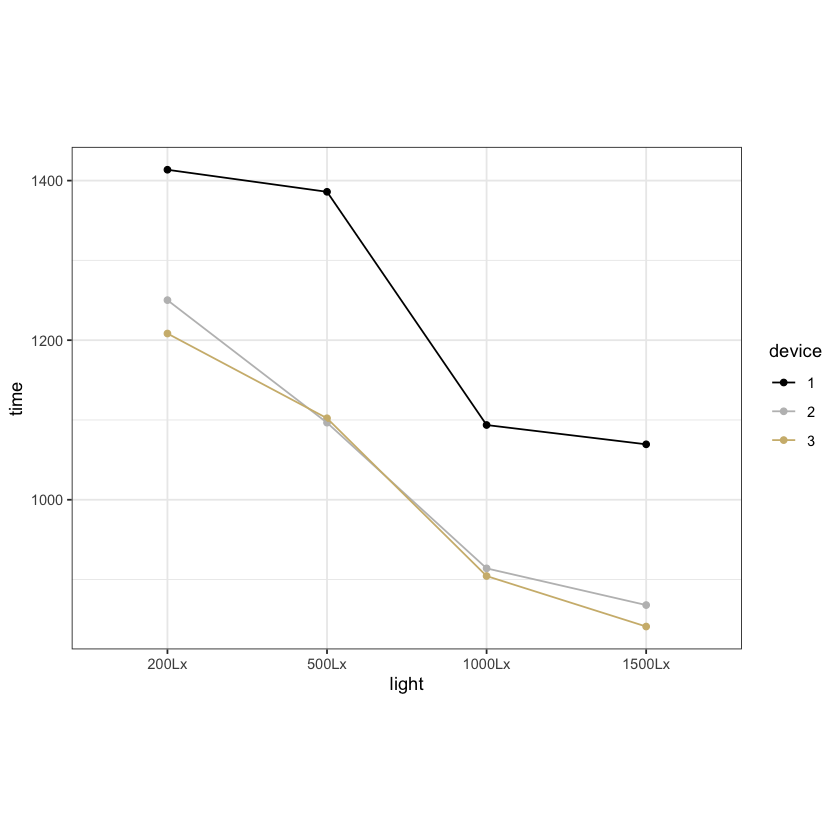

In [4]:
# Your Code Here
read %>%
    ggplot() + 
    aes(x = light, color = device, group = device, y = time) +
    stat_summary(fun.y = mean, geom = "point") +
    stat_summary(fun.y = mean, geom = "line") +
    scale_color_manual(values=c("black", "grey","#CFB87C")) +
    theme_bw() +
    coord_fixed(ratio=1/200)

**1.(b) Now, let's formally test for an interaction. Fit a model with an interaction, and one without, and conduct an F-test. State the appropriate decision for the test.**

In [5]:
# Your Code Here
twoway_interact = lm(time ~ device + light + device:light, data = read)
twoway = lm(time ~ device + light, data = read)
anova(twoway, twoway_interact)

summary(twoway)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,53,3628970,NA,NA,NA,NA
2,47,3603108,6,25861.55,0.05622427,0.9992146



Call:
lm(formula = time ~ device + light, data = read)

Residuals:
   Min     1Q Median     3Q    Max 
-500.0 -194.6  -24.8  204.9  460.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1438.25      87.22  16.489  < 2e-16 ***
device2      -209.73      83.89  -2.500 0.015547 *  
device3      -227.93      83.89  -2.717 0.008879 ** 
light500Lx    -97.46      97.30  -1.002 0.321052    
light1000Lx  -321.66      97.30  -3.306 0.001704 ** 
light1500Lx  -366.16      97.30  -3.763 0.000421 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 261.7 on 53 degrees of freedom
Multiple R-squared:  0.3455,	Adjusted R-squared:  0.2838 
F-statistic: 5.596 on 5 and 53 DF,  p-value: 0.0003268


**1.(c) Before we interpret this model with respect to research question #1 above (just below the data description), let's decide whether the differences that the model reports are statistically significant.**   

**Investigate this question using Bonferroni post hoc comparisons. That is, conduct all pairwise post hoc comparisons for device type using a Bonferroni correction and an overall type I error rate of $\alpha = 0.05$. Comment on the results.**

In [7]:
# Your Code Here
install.packages("lsmeans")
library(lsmeans)

pairs(lsmeans(twoway, "device"), adjust = "bonferroni")

also installing the dependencies ‘estimability’, ‘numDeriv’, ‘emmeans’





The downloaded binary packages are in
	/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T//RtmpKSXbbw/downloaded_packages


Loading required package: emmeans

The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.



 contrast          estimate   SE df t.ratio p.value
 device1 - device2    209.7 83.9 53   2.500  0.0466
 device1 - device3    227.9 83.9 53   2.717  0.0266
 device2 - device3     18.2 82.7 53   0.220  1.0000

Results are averaged over the levels of: light 
P value adjustment: bonferroni method for 3 tests 

**1.(d) Using the post hoc comparisons from above, let's focus on research question #1 from above: Are the effects of device type significant? That is, is there any evidence that suggests that individuals read faster or slower based on the device that they are using**

In [ ]:
# Your Code Here